# Activity 2: Fourier Transform Model of Image Formation (Part 1 of 2)

Mary Franczine Tan <br>
Applied Physics 157 WFY-WFX-1 <br>
Submitted May 19, 2023

## Acitivity 2.1 Familiarization with Discrete FT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
## create image of circle

def createCircle(n, r):
    N = n #the higher num is the finer 
    x = np.linspace(-1,1,num = N)
    y = x
    X,Y = np.meshgrid(x,y)
    R = np.sqrt(X**2 + Y**2)
    A = np.zeros(np.shape(R)) 
    A[np.where(R<r)] = 1.0 # conditional change radius of circle
    
    return A

sources:
- reused circle from Activity 1
- functoi for plotting derived from activity 1

In [3]:
def plotCircleTransforms(img1, img2, img3, img4, title, vmax = 6):
    """
    plot circle image and its transforms
    """
        
    fig1, axes = plt.subplots(1, 4, figsize = (12, 3)) # create figure
    
    ## plot original
    axes[0].imshow(img1, cmap='gray')
    axes[0].set_title('original', size = 10)
    axes[0].set_xticks([])
    axes[0].set_yticks([])
    
    ## plot FT
    axes[1].imshow(img2, cmap = 'hot')
    axes[1].set_title('FT', size = 10)    
    axes[1].set_xticks([])
    axes[1].set_yticks([])
    
    ## plot log FT
    axes[2].imshow(img3, cmap = 'hot')
    axes[2].set_title('FTshift', size = 10)
    axes[2].set_xticks([])
    axes[2].set_yticks([])
    
    ## plot FTshift
    axes[3].imshow(img4, cmap = 'hot', vmax = vmax)
    axes[3].set_title('log(FTshift)', size = 10)
    
    # sets title and fixes figure
    fig1.suptitle(title, size = 12)
    fig1.tight_layout()
    
    plt.axis('off')
    plt.show()
    plt.savefig('img.png')
    
    return

/var/folders/fj/cbg9yb3557sf2mgd7q1czp5w0000gn/T/ipykernel_53808/4023494674.py:5: RuntimeWarning: divide by zero encountered in log
  plotCircleTransforms(abs(A_05), abs(FA_05), abs(FAshift_05), abs(np.log(FAshift_05)),


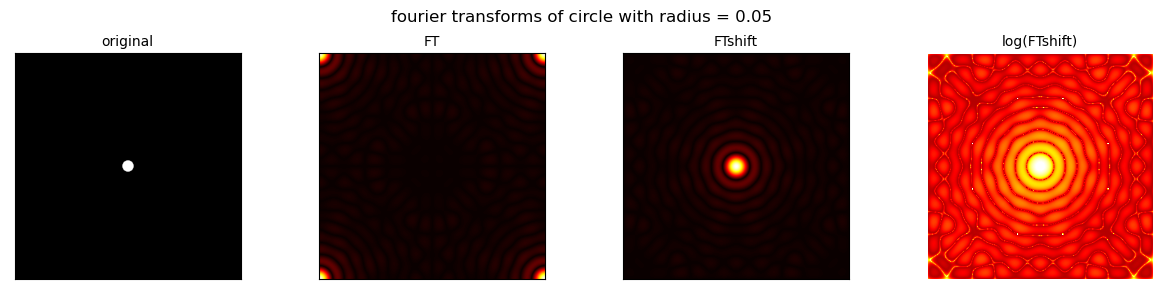

<Figure size 640x480 with 0 Axes>

In [4]:
A_05 = createCircle(400, 0.05) # create circle with radius 0.05
FA_05 = np.fft.fft2(A_05) # apply FT
FAshift_05 = np.fft.fftshift(FA_05) # apply FTshift

plotCircleTransforms(abs(A_05), abs(FA_05), abs(FAshift_05), abs(np.log(FAshift_05)), 
                     'fourier transforms of circle with radius = 0.05')

/var/folders/fj/cbg9yb3557sf2mgd7q1czp5w0000gn/T/ipykernel_53808/3082455903.py:5: RuntimeWarning: divide by zero encountered in log
  plotCircleTransforms(abs(A_01), abs(FA_01), abs(FAshift_01), abs(np.log(FAshift_01)),


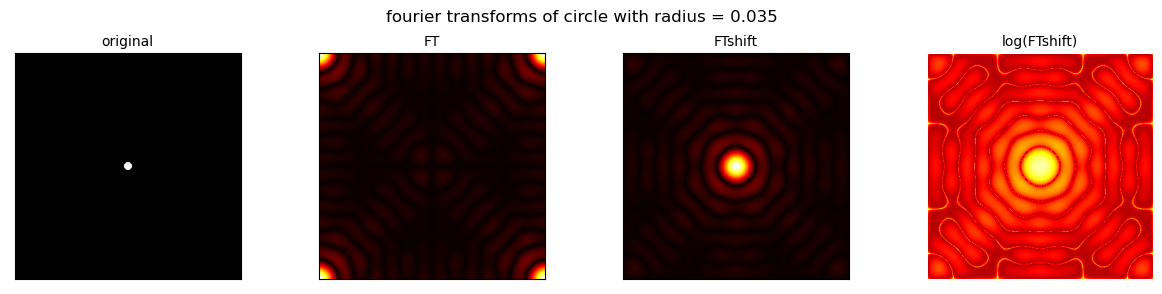

<Figure size 640x480 with 0 Axes>

In [5]:
A_01 = createCircle(400, 0.035) # create circle with radius 0.035
FA_01 = np.fft.fft2(A_01) # apply FT
FAshift_01 = np.fft.fftshift(FA_01) # apply FTshift

plotCircleTransforms(abs(A_01), abs(FA_01), abs(FAshift_01), abs(np.log(FAshift_01)), 
                     'fourier transforms of circle with radius = 0.035')

/var/folders/fj/cbg9yb3557sf2mgd7q1czp5w0000gn/T/ipykernel_53808/509892182.py:5: RuntimeWarning: divide by zero encountered in log
  plotCircleTransforms(abs(A_025), abs(FA_025), abs(FAshift_025), abs(np.log(FAshift_025)),


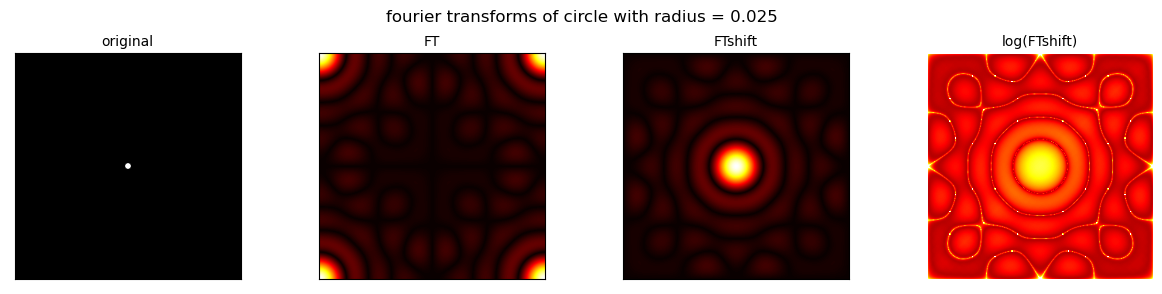

<Figure size 640x480 with 0 Axes>

In [6]:
A_025 = createCircle(400, 0.025) # create circle with radius 0.25
FA_025 = np.fft.fft2(A_025) # apply FT
FAshift_025 = np.fft.fftshift(FA_025) # apply FTshift

plotCircleTransforms(abs(A_025), abs(FA_025), abs(FAshift_025), abs(np.log(FAshift_025)), 
                     'fourier transforms of circle with radius = 0.025')

/var/folders/fj/cbg9yb3557sf2mgd7q1czp5w0000gn/T/ipykernel_53808/3459862106.py:5: RuntimeWarning: divide by zero encountered in log
  plotCircleTransforms(abs(A_01), abs(FA_01), abs(FAshift_01), abs(np.log(FAshift_01)),


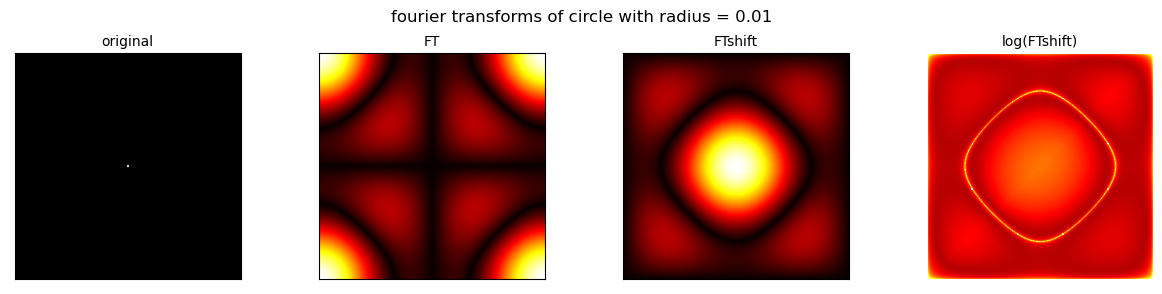

<Figure size 640x480 with 0 Axes>

In [7]:
A_01 = createCircle(400, 0.01) # create circle with radius 0.01
FA_01 = np.fft.fft2(A_01) # apply FT
FAshift_01 = np.fft.fftshift(FA_01) # apply FTshift

plotCircleTransforms(abs(A_01), abs(FA_01), abs(FAshift_01), abs(np.log(FAshift_01)), 
                     'fourier transforms of circle with radius = 0.01')

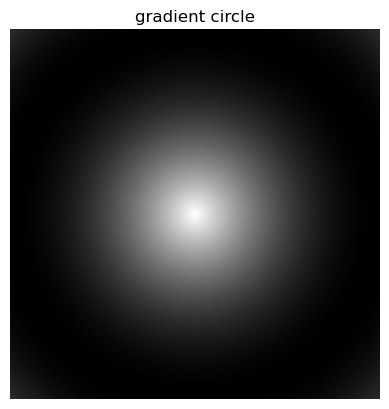

In [8]:
N = 400 #the higher num is the finer 
x = np.linspace(-1,1,num = N)
y = x
X,Y = np.meshgrid(x,y)
R = 1 -  np.sqrt(X**2 + Y**2)
A = 1 - 1 / (1  + (R / 15) ** 2)

plt.axis('off')
plt.title('gradient circle')
plt.imshow(A, cmap='gray')

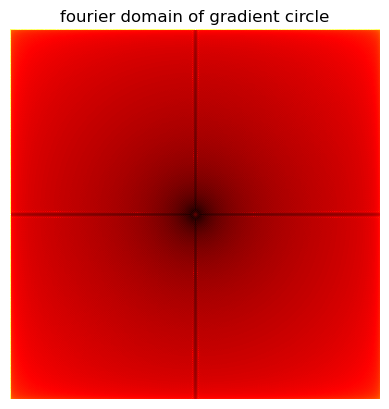

In [9]:
RF = np.fft.fft2(A)
RFshift = np.fft.fftshift(RF)

plt.axis('off')
plt.title('fourier domain of gradient circle')
plt.imshow(abs(np.log(RFshift)), cmap = 'hot')

### Apply Fourier Transform on Grayscale Images

In [10]:
## load images
img1 =  mpimg.imread('IMG_3264.JPG') 
img2 = mpimg.imread('IMG_2954.JPG')
img3 = mpimg.imread('IMG_3187.JPG')

def rgb2gray(rgb):
    """
    converts rgb image to grayscale
    """
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

## convert images to grayscale
gray1 = rgb2gray(img1) 
gray2 = rgb2gray(img2)
gray3 = rgb2gray(img3)

In [11]:
def plotFouriers(i1, i2, i3, title):
    fig, ax = plt.subplots(1, 4, figsize = (12, 3))

    ax[0].imshow(abs(np.log(i1)), cmap='gray')
    ax[0].set_title('log of fft2()', size = 10)
    ax[1].imshow(abs(np.log(np.fft.fftshift(i1))), cmap = 'gray')
    ax[1].set_title('shift of log fft2()', size = 10)
    ax[2].imshow(abs(i2), cmap='gray')
    ax[2].set_title('double fft2()', size = 10)
    ax[3].imshow(abs(i3), cmap='gray')
    ax[3].set_title('fft2() and ifft2()', size = 10)

    # sets title and fixes figure
    fig.suptitle(title, size = 12)
    fig.tight_layout()
    
    for i in range(4):
        ax[i].axis('off')
    plt.show()
            
    return

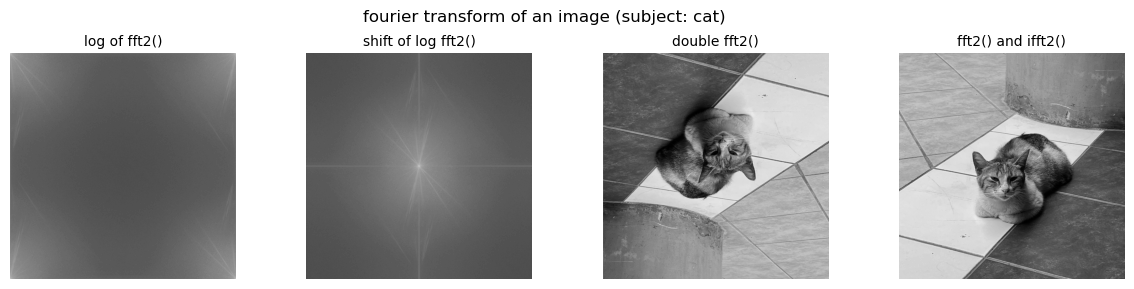

In [12]:
F_gray1 = np.fft.fft2(gray1)
FF_gray1 = np.fft.fft2(F_gray1)
FIF_gray1 = np.fft.ifft2(F_gray1)

plotFouriers(F_gray1, FF_gray1, FIF_gray1, 'fourier transform of an image (subject: cat)')

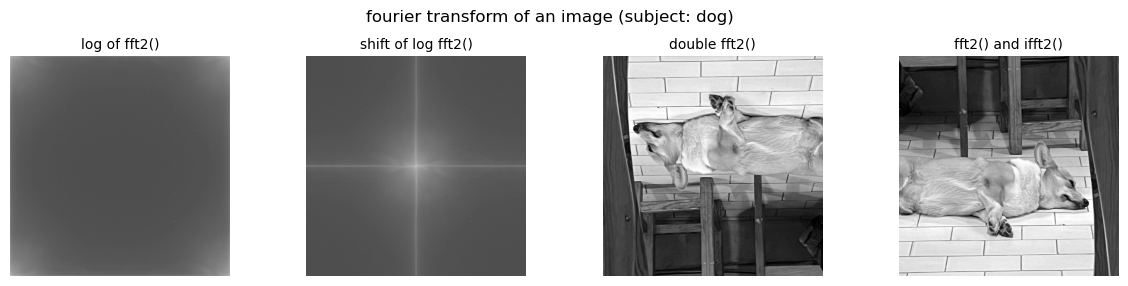

In [13]:
F_gray2 = np.fft.fft2(gray2)
FF_gray2 = np.fft.fft2(F_gray2)
FIF_gray2 = np.fft.ifft2(F_gray2)

plotFouriers(F_gray2, FF_gray2, FIF_gray2, 'fourier transform of an image (subject: dog)')

## Activity 2.2 Simulation of an Imaging System

to do
- function for creating circle na different radius sizes
- function for convolution
- plot results

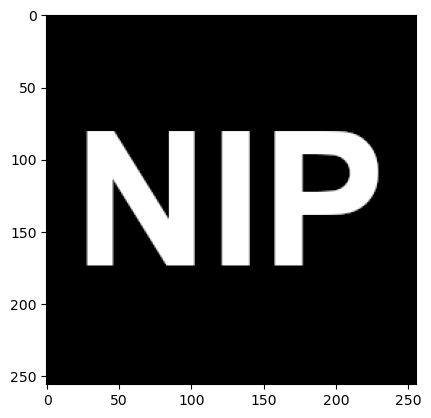

In [14]:
nip_original = mpimg.imread('NIP.tif')
grayNIP = rgb2gray(nip_original)
plt.imshow(grayNIP, cmap = 'gray')

In [15]:
def convolution(img, lens):
    
    Fshift_lens = np.fft.fftshift(lens)
    Fimg = np.fft.fft2(img)

    multiplied = Fimg * Fshift_lens
    i_multiplied = np.fft.ifft2(multiplied)
    
    return i_multiplied

In [16]:
## create different apertures

A_01 = createCircle(256, 0.01)
A_05 = createCircle(256, 0.05)
A_10 = createCircle(256, 0.1)
A_25 = createCircle(256, 0.25)
A_50 = createCircle(256, 0.50)
A_75 = createCircle(256, 0.75)

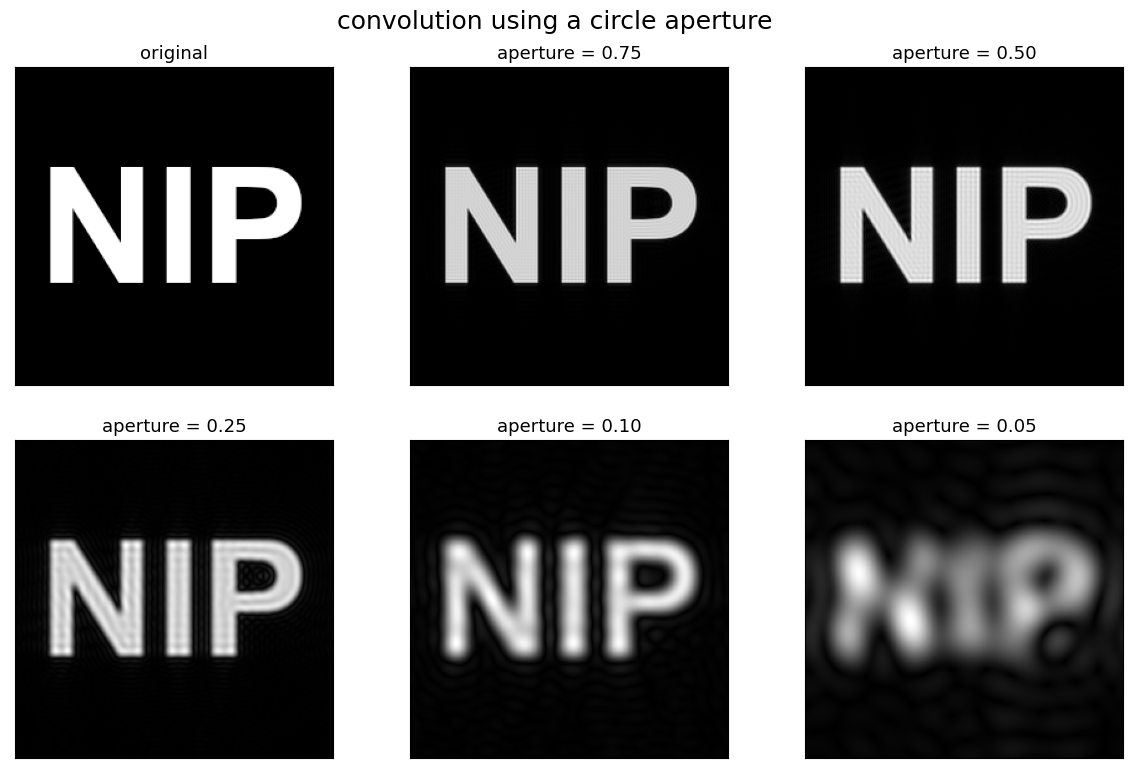

In [17]:
## do convolution using different apertures

conv_05 = convolution(grayNIP, A_05)
conv_10 = convolution(grayNIP, A_10)
conv_25 = convolution(grayNIP, A_25)
conv_50 = convolution(grayNIP, A_50)
conv_75 = convolution(grayNIP, A_75)

## plot different results

fig, ax = plt.subplots(2, 3, figsize = (12, 8))

ax[0][0].imshow(grayNIP, cmap='gray')
ax[0][0].set_title('original', size = 13)
ax[0][1].imshow(abs(conv_75), cmap='gray')
ax[0][1].set_title('aperture = 0.75', size = 13)
ax[0][2].imshow(abs(conv_50), cmap='gray')
ax[0][2].set_title('aperture = 0.50', size = 13)
ax[1][0].imshow(abs(conv_25), cmap='gray')
ax[1][0].set_title('aperture = 0.25', size = 13)
ax[1][1].imshow(abs(conv_10), cmap='gray')
ax[1][1].set_title('aperture = 0.10', size = 13)
ax[1][2].imshow(abs(conv_05), cmap='gray')
ax[1][2].set_title('aperture = 0.05', size = 13)

plt.suptitle('convolution using a circle aperture', size = 18)
fig.tight_layout()

for i in range(2):
    for j in range(3):
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
        



In [18]:
def plotconvolution(i1, i2, i3, i4, i5, i6, title):
    
    fig, ax = plt.subplots(2, 3, figsize = (12, 8))
    
    ax[0][0].imshow(i1, cmap='gray')
    ax[0][0].set_title('wide {}'.format(title), size = 13)
    ax[0][1].imshow(abs(i2), cmap='gray')
    ax[0][1].set_title('medium {}'.format(title), size = 13)
    ax[0][2].imshow(abs(i3), cmap='gray')
    ax[0][2].set_title('narrow {}'.format(title), size = 13)
    ax[1][0].imshow(abs(i4), cmap='gray')
    ax[1][0].set_title('result for wide {}'.format(title), size = 13)
    ax[1][1].imshow(abs(i5), cmap='gray')
    ax[1][1].set_title('result for medium {}'.format(title), size = 13)
    ax[1][2].imshow(abs(i6), cmap='gray')
    ax[1][2].set_title('result for narrow {}'.format(title), size = 13)
    
    plt.suptitle('convolution using {} aperture'.format(title), size = 18)
    fig.tight_layout()
    
    for i in range(2):
        for j in range(3):
            ax[i][j].set_xticks([])
            ax[i][j].set_yticks([])
      
    plt.show()

In [19]:
# read new apertures

horWide = rgb2gray(mpimg.imread('horizontal.png'))
horMedium = rgb2gray(mpimg.imread('horizontal-2.png'))
horNarrow = rgb2gray(mpimg.imread('horizontal-1.png'))

verWide = rgb2gray(mpimg.imread('slits.png'))
verMedium = rgb2gray(mpimg.imread('slits-1.png'))
verNarrow = rgb2gray(mpimg.imread('slits-2.png'))

squareWide = rgb2gray(mpimg.imread('square.png'))
squareMedium = rgb2gray(mpimg.imread('square-2.png'))
squareNarrow = rgb2gray(mpimg.imread('square-1.png'))

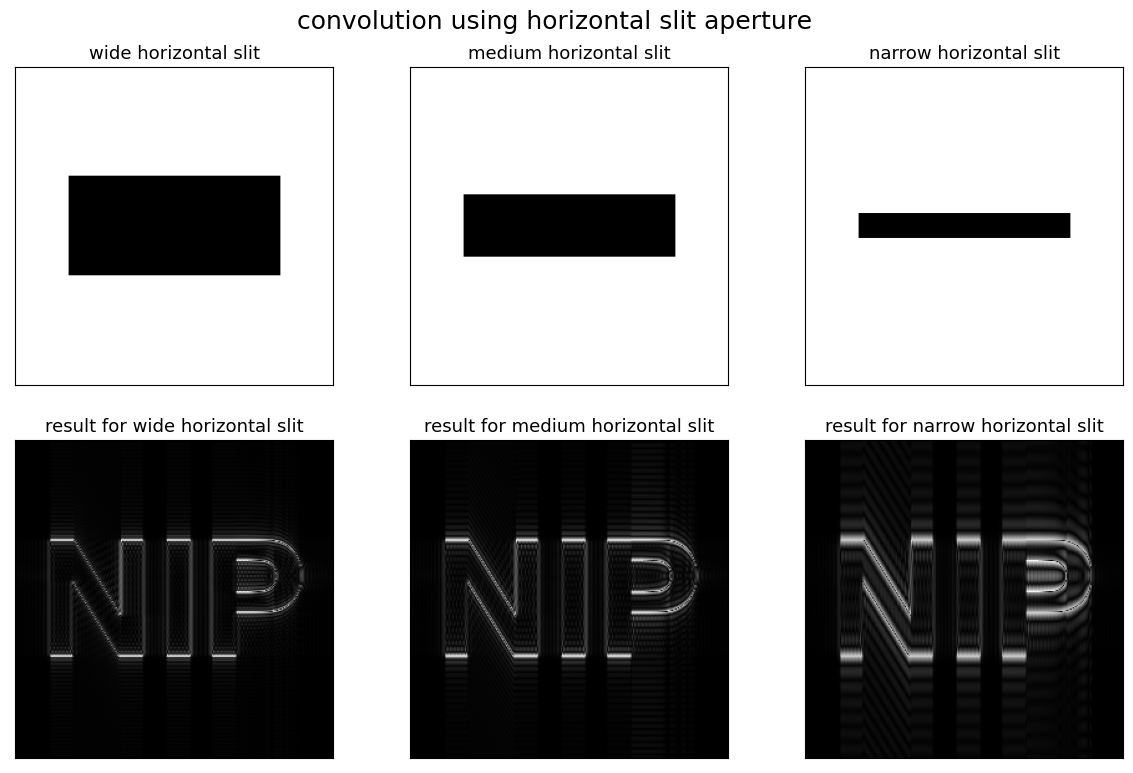

In [20]:
horWide_conv = convolution(grayNIP, horWide)
horMedium_conv = convolution(grayNIP, horMedium)
horNarrow_conv  = convolution(grayNIP, horNarrow)

plotconvolution(horWide, horMedium, horNarrow, horWide_conv, horMedium_conv, horNarrow_conv, 'horizontal slit')

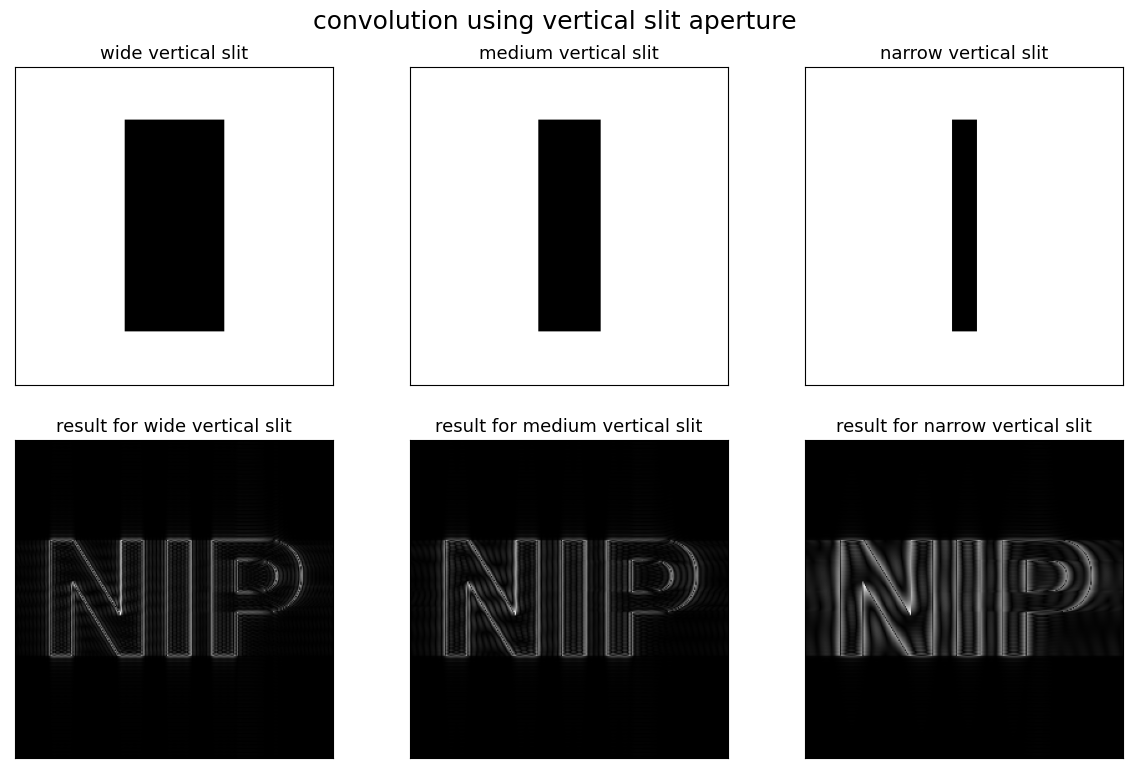

In [21]:
verWide_conv = convolution(grayNIP, verWide)
verMedium_conv = convolution(grayNIP, verMedium)
verNarrow_conv  = convolution(grayNIP, verNarrow)

plotconvolution(verWide, verMedium, verNarrow, verWide_conv, verMedium_conv, verNarrow_conv, 'vertical slit')

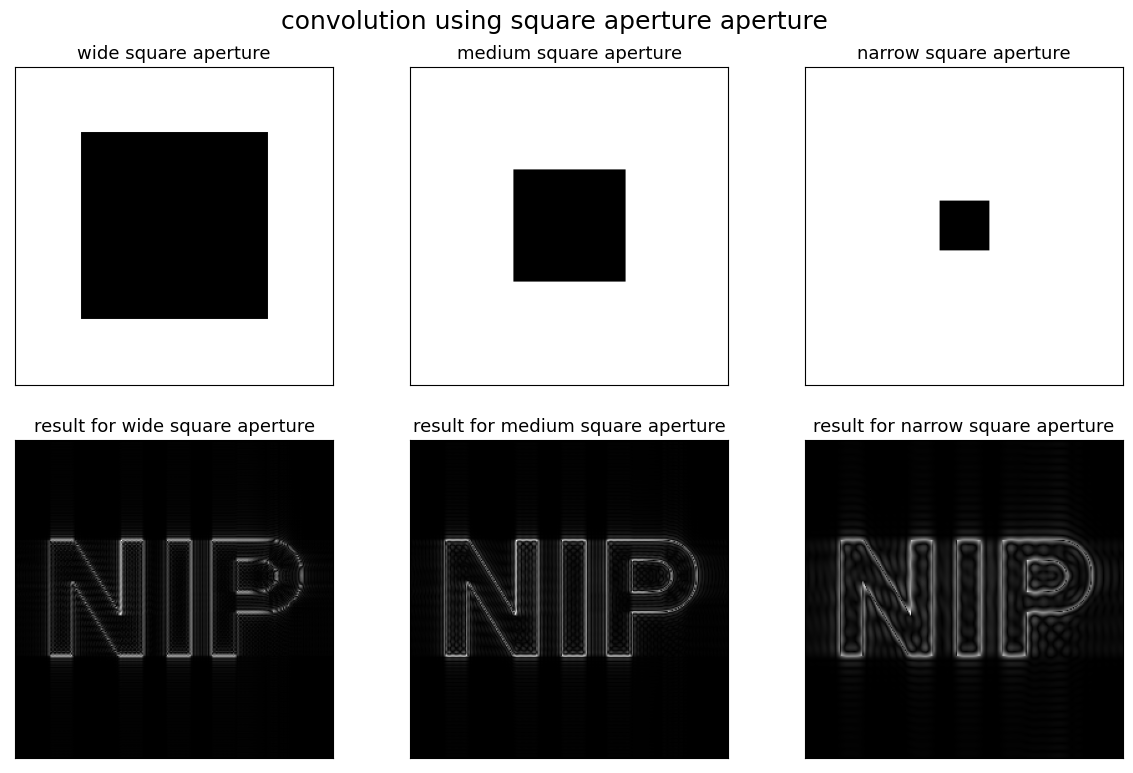

In [22]:
squareWide_conv = convolution(grayNIP, squareWide)
squareMedium_conv = convolution(grayNIP, squareMedium)
squareNarrow_conv  = convolution(grayNIP, squareNarrow)

plotconvolution(squareWide, squareMedium, squareNarrow, squareWide_conv, squareMedium_conv, 
                squareNarrow_conv, 'square aperture')

### James Webb Space Telescope

(-0.5, 255.5, 255.5, -0.5)

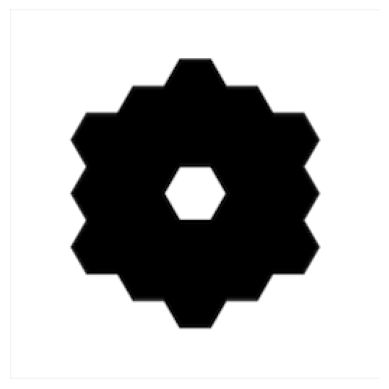

In [23]:
## import jwst image

jwst_black = mpimg.imread('jwst_black.png')
jwst = rgb2gray(jwst_black)
plt.imshow(jwst, cmap='gray')
plt.axis('off')

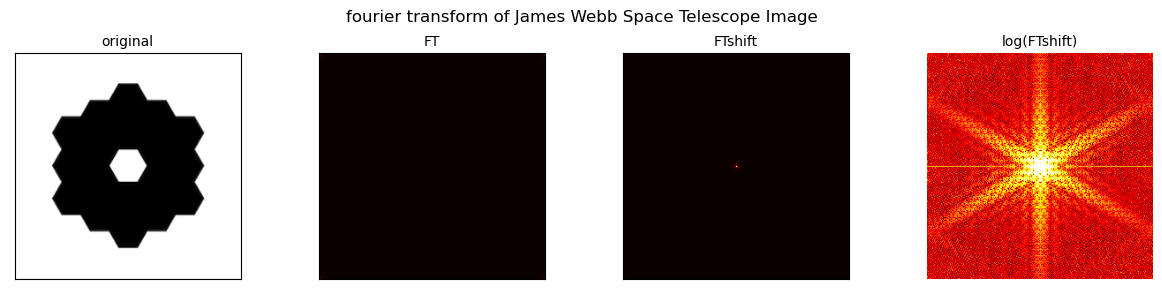

<Figure size 640x480 with 0 Axes>

In [24]:
Fjwst = np.fft.fft2(jwst) # apply FT
Fjwstshift = np.fft.fftshift(Fjwst) # apply FTshift

plotCircleTransforms(abs(jwst), abs(Fjwst), abs(Fjwstshift), abs(np.log(Fjwstshift)), 
                     'fourier transform of James Webb Space Telescope Image')

### hubble space telescope

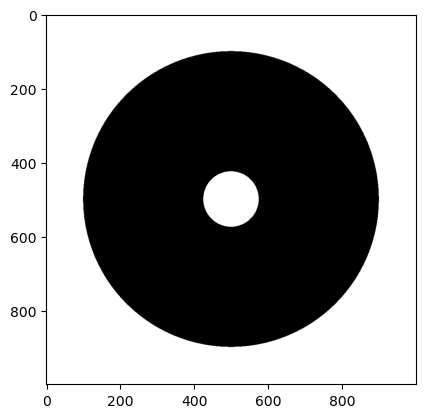

In [25]:
N = 1000 #the higher num is the finer 
x = np.linspace(-1,1,num = N) # declare x values
y = x # declare y values
X,Y = np.meshgrid(x,y) # create meshgrid

## main circle

R = np.sqrt(X**2 + Y**2) # find values of r
A = np.zeros(np.shape(R)) # create empty array
A[np.where(R>0.8)] = 1.0 # set citcle radius

## hole in circle

R_inner = np.sqrt(X**2 + Y**2)
A_inner = np.zeros(np.shape(R)) 
A_inner[np.where(R>0.15)] = 1.0

# subtract arrays to create hubble shape
hubble = A - A_inner

#display as an image
plt.imshow(hubble, cmap = "gray")

/var/folders/fj/cbg9yb3557sf2mgd7q1czp5w0000gn/T/ipykernel_53808/2294619488.py:4: RuntimeWarning: divide by zero encountered in log
  plotCircleTransforms(hubble, abs(Fhubble), abs(Fhubble_shift), abs(np.log(Fhubble_shift)),


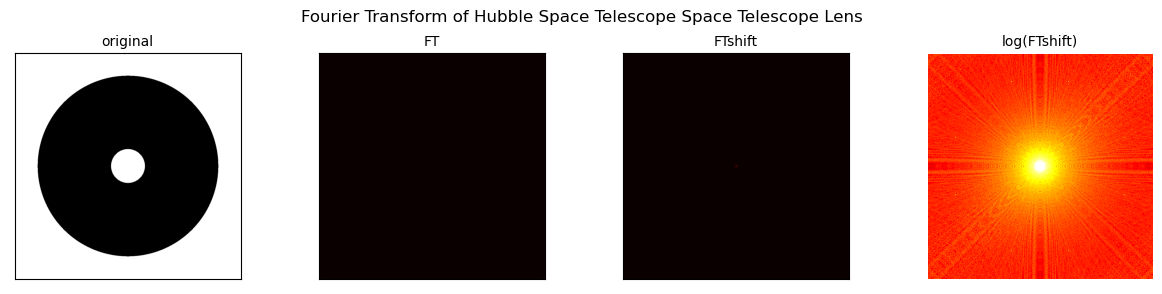

<Figure size 640x480 with 0 Axes>

In [26]:
Fhubble = np.fft.fft2(hubble) # apply FT
Fhubble_shift = np.fft.fftshift(Fhubble) # apply FTshift

plotCircleTransforms(hubble, abs(Fhubble), abs(Fhubble_shift), abs(np.log(Fhubble_shift)), 
                     'Fourier Transform of Hubble Space Telescope Space Telescope Lens', 7.5)

## correlation

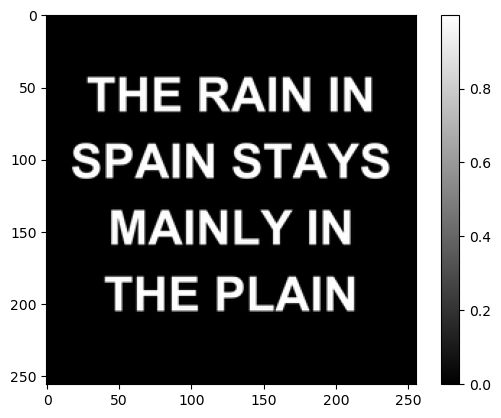

In [27]:
rain = plt.imread('RAIN.png')
grayRAIN = rgb2gray(rain)
plt.imshow(grayRAIN, cmap='gray') 
plt.colorbar()

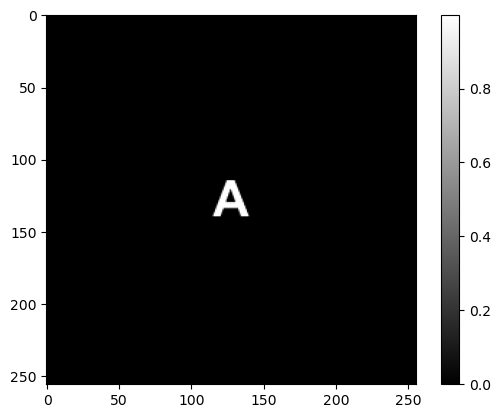

In [28]:
A = plt.imread('a.png')
grayA = rgb2gray(A)
plt.imshow(grayA, cmap = 'gray') 
plt.colorbar()

In [29]:
F_rain = np.fft.fft2(grayRAIN)
FA = np.fft.fft2(grayA)

In [30]:
A_conj = np.conjugate(F_rain)

multiplied = FA * A_conj

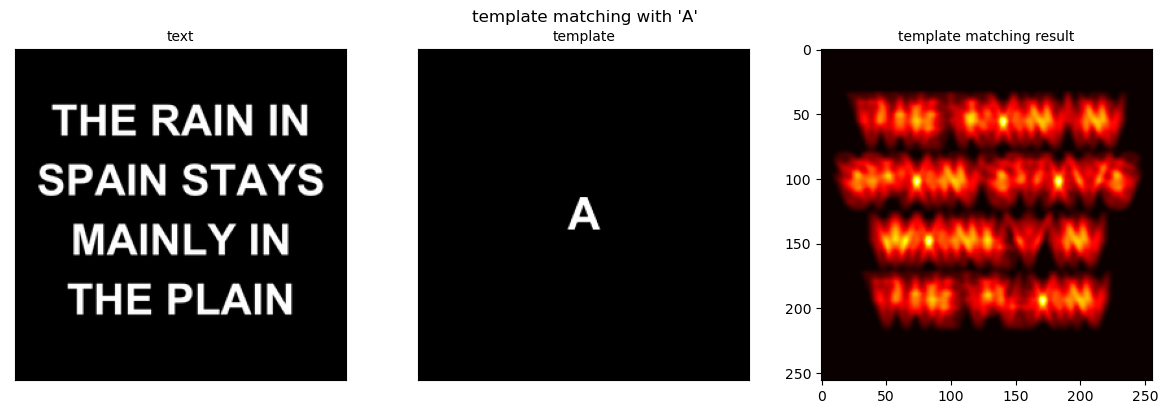

In [31]:
i_multiplied = np.fft.fft2(multiplied)
shifted = np.fft.fftshift(i_multiplied)
#plt.imshow(np.abs(shifted), cmap='gray')

fig, ax = plt.subplots(1,3, figsize = (12,4))

ax[0].imshow(grayRAIN, cmap = 'gray')
ax[0].set_title('text', size = 10)
ax[1].imshow(A, cmap = 'gray')
ax[1].set_title('template', size = 10)
ax[2].imshow(np.abs(shifted), cmap = 'hot')
ax[2].set_title('template matching result', size = 10)

for i in range(2):
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.suptitle('template matching with \'A\'', size = 12)
fig.tight_layout()

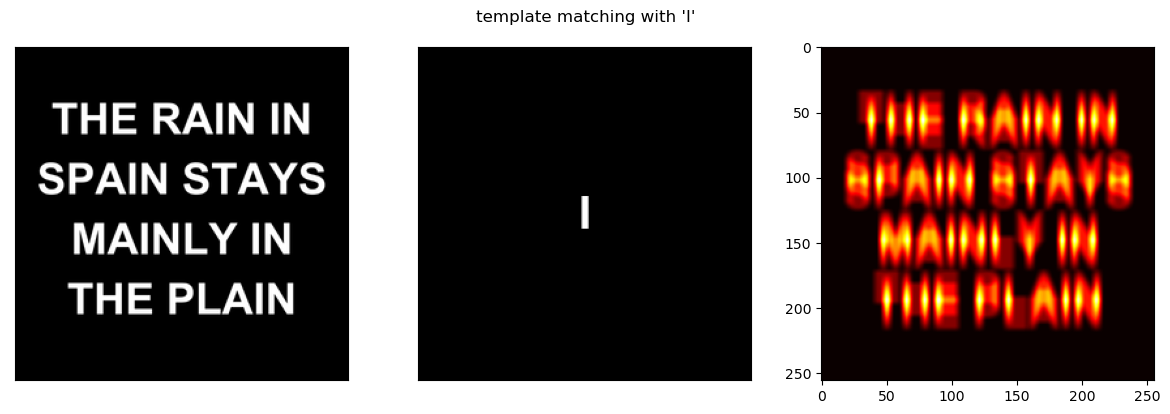

In [32]:
I = plt.imread('i.png')
grayI = rgb2gray(I)

F_rain = np.fft.fft2(grayRAIN)
FI = np.fft.fft2(grayI)

I_conj = np.conjugate(F_rain)

multiplied = FI * I_conj

i_multiplied = np.fft.fft2(multiplied)
shifted = np.fft.fftshift(i_multiplied)
#plt.imshow(np.abs(shifted), cmap='gray')


fig, ax = plt.subplots(1,3, figsize = (12,4))

ax[0].imshow(grayRAIN, cmap = 'gray')
ax[1].imshow(I, cmap = 'gray')
ax[2].imshow(np.abs(shifted), cmap = 'hot')

for i in range(2):
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.suptitle('template matching with \'I\'', size = 12)
fig.tight_layout()
#fig.colorbar(grayRAIN)